In [1]:
#!pip install numpy matplotlib pandas notebook

# AIMD Simulations and Numerical Experiments

## AIMD Simulations and Numerical Experiments
We simulate a two-user scenario where each user shares a bottleneck link of capacity \\( C = 50 \\). The users increase their congestion window additively and decrease it multiplicatively when congestion occurs.

**Simulation Parameters:**
- \\( \alpha_1 = 1, \alpha_2 = 1 \\)
- \\( \beta_1 = 0.5, \beta_2 = 0.5 \\)
- Initial allocations: \\( x_1 = 2, x_2 = 25 \\)

The results show that AIMD converges to a stable state, oscillating around the fair allocation point \\( (C/2, C/2) \\).


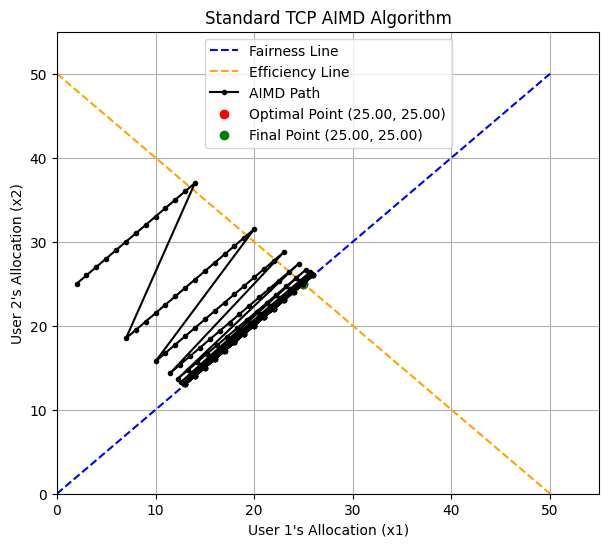

Number of iterations to converge: 179
Final x1: 25.00, Final x2: 25.00


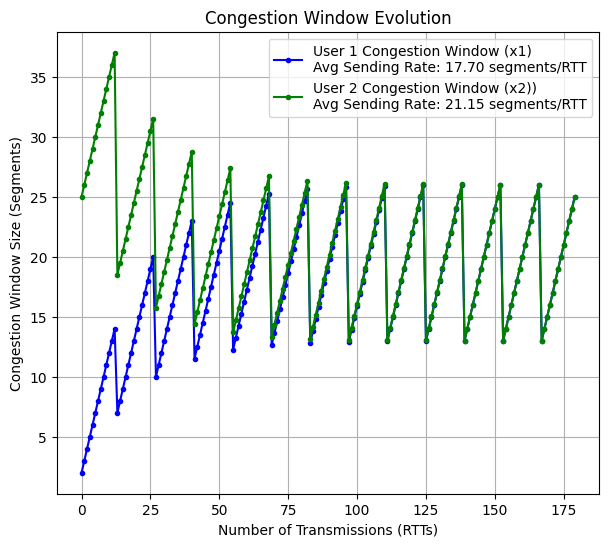

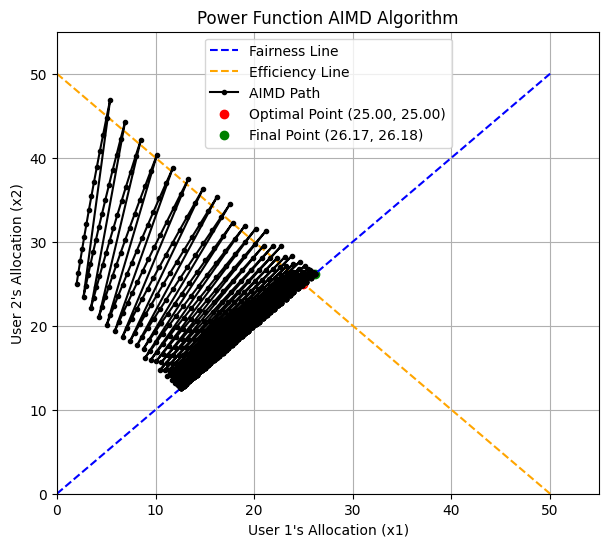

Number of iterations to converge: 1000
Final x1: 26.17, Final x2: 26.18


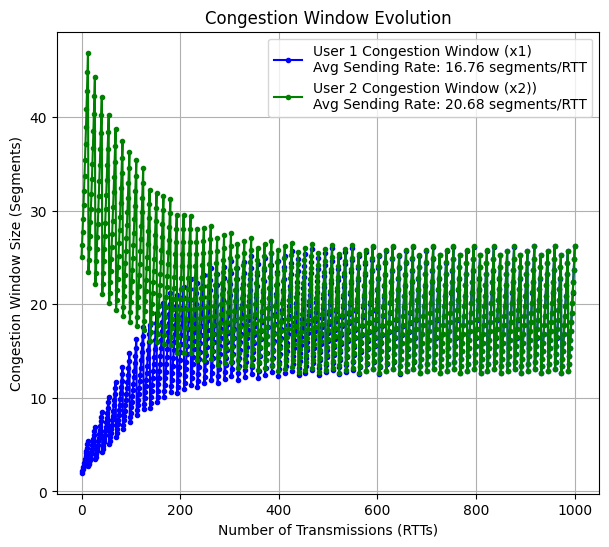

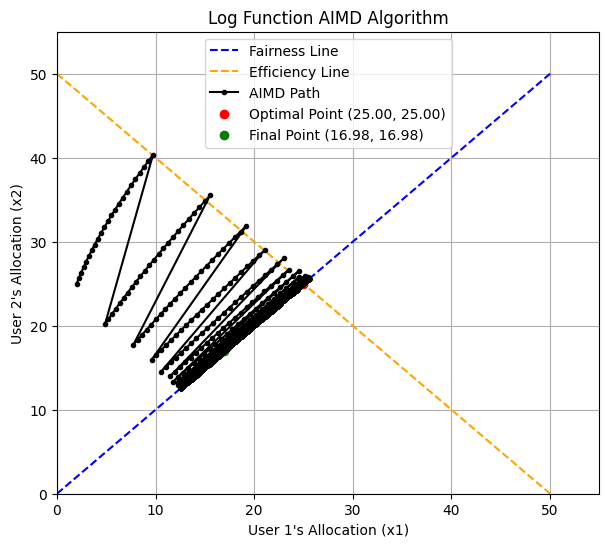

Number of iterations to converge: 1000
Final x1: 16.98, Final x2: 16.98


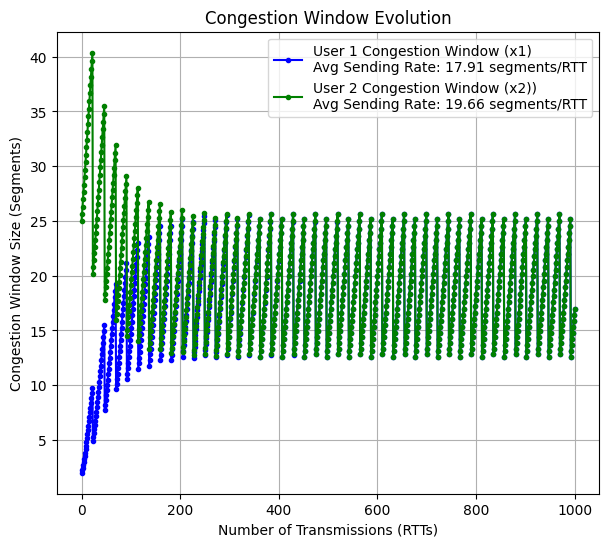

In [2]:
import datetime
import numpy as np
import matplotlib.pyplot as plt


def aimd_simulation(C, x1, x2, alpha1, alpha2, beta1=0.5, beta2=0.5, growth_function=None, max_iterations=1000):
    """
    Simulates the AIMD algorithm with optional custom growth functions.

    Args:
        C (int): Maximum capacity.
        x1 (int): Initial allocation for User 1.
        x2 (int): Initial allocation for User 2.
        alpha1 (float): Additive increase factor for User 1.
        alpha2 (float): Additive increase factor for User 2.
        beta1 (float): Multiplicative decrease factor for User 1.
        beta2 (float): Multiplicative decrease factor for User 2.
        growth_function (function, optional): Custom growth function for AIMD.
        max_iterations (int): Maximum number of iterations for the simulation.

    Returns:
        tuple: Iterations, x1 values, x2 values, final x1, final x2.
    """
    iterations = 0
    x1_values = [x1]
    x2_values = [x2]

    while iterations < max_iterations:
        if x1 + x2 <= C:
            if growth_function:
                x1 += growth_function(x1)
                x2 += growth_function(x2)
            else:
                x1 += alpha1
                x2 += alpha2
        else:
            x1 *= (1 - beta1)
            x2 *= (1 - beta2)

        x1_values.append(x1)
        x2_values.append(x2)
        iterations += 1

        # if abs(x1 + x2 - C) < 0.1 and abs(x1 - x2) < 0.1:
        if abs(x1 + x2 - C) < 1e-2 and abs(x1 - x2) < 1e-2:  # Convergence condition

            break

    return iterations, x1_values, x2_values, x1, x2


def plot_aimd_results(C, x1_values, x2_values, iterations, title, output):
    """
    Plots the results of the AIMD simulation.

    Args:
        C (int): Maximum capacity.
        x1_values (list): Congestion window values for User 1.
        x2_values (list): Congestion window values for User 2.
        iterations (int): Number of iterations.
        title (str): Title of the plot.
        output (str): Output file name for the plot.
    """
    # Optimal point for fairness and efficiency
    optimal_x = C / 2
    optimal_y = C / 2

    # Fairness and efficiency lines
    fairness_line = np.linspace(0, C, 100)
    efficiency_line = C - fairness_line

    # Main plot
    plt.figure(figsize=(7, 6))
    plt.plot(fairness_line, fairness_line, 'b--', label='Fairness Line')
    plt.plot(fairness_line, efficiency_line, 'orange', linestyle='--', label='Efficiency Line')
    plt.plot(x1_values, x2_values, 'k.-', label='AIMD Path')
    plt.scatter(optimal_x, optimal_y, c='red', label=f'Optimal Point ({optimal_x:.2f}, {optimal_y:.2f})')
    plt.scatter(x1_values[-1], x2_values[-1], c='green', label=f'Final Point ({x1_values[-1]:.2f}, {x2_values[-1]:.2f})')

    # Labels and limits
    plt.xlabel("User 1's Allocation (x1)")
    plt.ylabel("User 2's Allocation (x2)")
    plt.xlim(0, C * 1.1)
    plt.ylim(0, C * 1.1)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig(output)
    plt.show()

    print(f"Number of iterations to converge: {iterations}")
    print(f"Final x1: {x1_values[-1]:.2f}, Final x2: {x2_values[-1]:.2f}")


def aimd_congestion_window_plot(rtt_values, x_values, user, sending_rate, title):
    """
    Plots the congestion window evolution for a specific user.

    Args:
        rtt_values (list): RTT values (time steps).
        x_values (list): Congestion window values.
        user (str): User label (e.g., x1 or x2).
        sending_rate (float): Average sending rate.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(7, 6))
    plt.plot(rtt_values, x_values, 'k.-', label=f'Congestion Window for {user}')
    plt.xlabel("Number of Transmissions (RTTs)")
    plt.ylabel("Congestion Window Size (Segments)")
    plt.title(f"{title} - {user}")
    plt.annotate(f"Sending Rate: {sending_rate:.2f} segments/RTT", xy=(len(rtt_values) / 2, max(x_values) / 2))
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_congestion_windows(rtt_values, x1_values, x2_values):
    """
    Plots the congestion window evolution for both users with the correct sending rate calculation.

    Args:
        rtt_values (list): RTT values (time steps).
        x1_values (list): Congestion window values for User 1.
        x2_values (list): Congestion window values for User 2.
    """
    # Correct sending rate calculations
    sending_rate_x1 = sum(x1_values) / len(rtt_values)  # Average congestion window size for User 1
    sending_rate_x2 = sum(x2_values) / len(rtt_values)  # Average congestion window size for User 2

    plt.figure(figsize=(7, 6))

    # Plot for User 1
    plt.plot(rtt_values, x1_values, 'b.-', label=f"User 1 Congestion Window (x1)\nAvg Sending Rate: {sending_rate_x1:.2f} segments/RTT")

    # Plot for User 2
    plt.plot(rtt_values, x2_values, 'g.-', label=f"User 2 Congestion Window (x2))\nAvg Sending Rate: {sending_rate_x2:.2f} segments/RTT")
    
    # Labels, title, and grid
    plt.xlabel("Number of Transmissions (RTTs)")
    plt.ylabel("Congestion Window Size (Segments)")
    plt.title("Congestion Window Evolution")
    plt.legend()
    plt.grid(True)
    plt.show()


# Example usage with dynamic AIMD options
if __name__ == "__main__":
    current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

    # Standard AIMD
    iterations, x1_values, x2_values, final_x1, final_x2 = aimd_simulation(
        C=50, x1=2, x2=25, alpha1=1, alpha2=1, beta1=0.5, beta2=0.5
    )
    rtt_values = np.arange(0, iterations + 1)
    plot_aimd_results(
        C=50, x1_values=x1_values, x2_values=x2_values, iterations=iterations,
        title="Standard TCP AIMD Algorithm", output=f"standard_aimd_{current_time}.svg"
    )
    plot_congestion_windows(rtt_values, x1_values, x2_values)
    
    # Power Function AIMD
    power_function = lambda cwnd: 0.1 * (cwnd ** 0.8)
    iterations, x1_values, x2_values, final_x1, final_x2 = aimd_simulation(
        C=50, x1=2, x2=25, alpha1=1, alpha2=1, beta1=0.5, beta2=0.5, growth_function=power_function
    )
    
    # Calculate RTT values based on the length of the output
    rtt_values = np.arange(0, len(x1_values))
    
    # Plot results for Power Function AIMD
    plot_aimd_results(
        C=50, x1_values=x1_values, x2_values=x2_values, iterations=iterations,
        title="Power Function AIMD Algorithm", output=f"power_aimd_{current_time}.svg"
    )
    plot_congestion_windows(rtt_values, x1_values, x2_values)
    
    
    # Log Function AIMD
    log_function = lambda cwnd: 0.2 * np.log(1 + cwnd)
    iterations, x1_values, x2_values, final_x1, final_x2 = aimd_simulation(
        C=50, x1=2, x2=25, alpha1=1, alpha2=1, beta1=0.5, beta2=0.5, growth_function=log_function
    )
    
    # Recalculate RTT values for Log Function AIMD
    rtt_values = np.arange(0, len(x1_values))
    
    # Plot results for Log Function AIMD
    plot_aimd_results(
        C=50, x1_values=x1_values, x2_values=x2_values, iterations=iterations,
        title="Log Function AIMD Algorithm", output=f"log_aimd_{current_time}.svg"
    )
    plot_congestion_windows(rtt_values, x1_values, x2_values)



## High-Speed AIMD
To address AIMD inefficiencies in high-speed networks, we introduce threshold-based tuning:
- Below a threshold, standard AIMD is applied.
- Above the threshold, adaptive functions for increase and decrease are used:

  \\[
  \alpha(w) = 0.05 \times w^{0.6}, \quad \beta(w) = \frac{0.3}{w+2}
  \\]

The results indicate faster convergence and improved bandwidth utilization, making it suitable for data center environments.


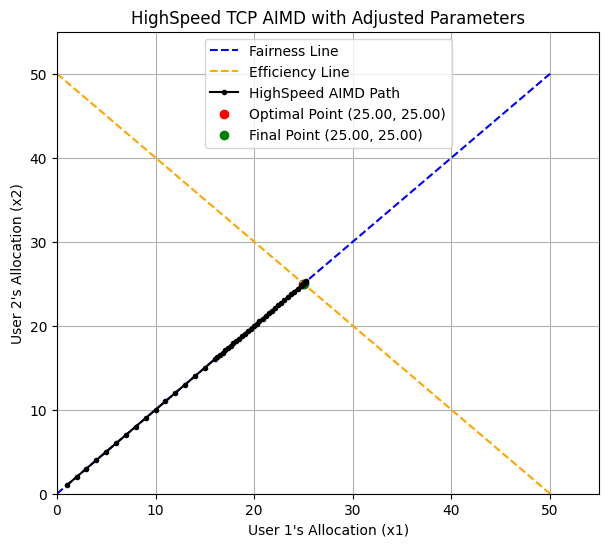

Number of iterations to converge: 52
Final x1: 25.00, Final x2: 25.00


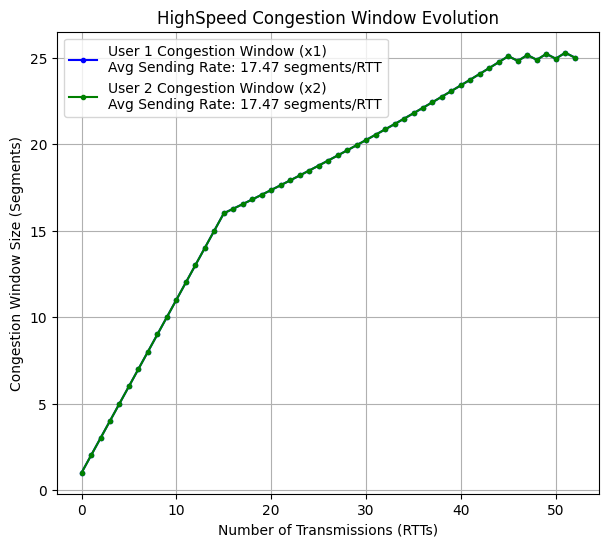

In [3]:
import datetime
import numpy as np
import matplotlib.pyplot as plt


def highspeed_aimd_simulation(C, x1, x2, alpha1, alpha2, beta1=0.5, beta2=0.5, threshold=30, max_iterations=1000):
    """
    Simulates the HighSpeed AIMD algorithm with threshold-based adjustments.

    Args:
        C (int): Maximum capacity.
        x1 (int): Initial allocation for User 1.
        x2 (int): Initial allocation for User 2.
        alpha1 (float): Additive increase factor for User 1.
        alpha2 (float): Additive increase factor for User 2.
        beta1 (float): Multiplicative decrease factor for User 1.
        beta2 (float): Multiplicative decrease factor for User 2.
        threshold (int): Threshold for switching to HighSpeed AIMD behavior.
        max_iterations (int): Maximum number of iterations for the simulation.

    Returns:
        tuple: Iterations, x1 values, x2 values, final x1, final x2.
    """
    iterations = 0
    x1_values = [x1]
    x2_values = [x2]

    # Dynamic growth and decrease functions for HighSpeed AIMD
    def dynamic_a(w):
        return 0.05 * (w ** 0.6)

    def dynamic_b(w):
        return 0.3 / (w + 2)

    while iterations < max_iterations:
        if x1 + x2 <= C:  # Additive Increase
            if x1 + x2 <= threshold:
                x1 += alpha1
                x2 += alpha2
            else:  # HighSpeed AIMD
                x1 += dynamic_a(x1)
                x2 += dynamic_a(x2)
        else:  # Multiplicative Decrease
            if x1 + x2 <= threshold:
                x1 *= (1 - beta1)
                x2 *= (1 - beta2)
            else:  # HighSpeed AIMD
                x1 *= (1 - dynamic_b(x1))
                x2 *= (1 - dynamic_b(x2))

        x1_values.append(x1)
        x2_values.append(x2)
        iterations += 1

        # Convergence condition
        # if abs(x1 + x2 - C) < 1e-2 and abs(x1 - x2) < 1e-2:
        if abs(x1 + x2 - C) < 1e-2 and abs(x1 - x2) < 1e-2:  # Convergence condition
            break

    return iterations, x1_values, x2_values, x1, x2


def plot_highspeed_aimd_results(C, x1_values, x2_values, iterations, title, output):
    """
    Plots the results of the HighSpeed AIMD simulation.

    Args:
        C (int): Maximum capacity.
        x1_values (list): Congestion window values for User 1.
        x2_values (list): Congestion window values for User 2.
        iterations (int): Number of iterations.
        title (str): Title of the plot.
        output (str): Output file name for the plot.
    """
    # Optimal point for fairness and efficiency
    optimal_x = C / 2
    optimal_y = C / 2

    # Fairness and efficiency lines
    fairness_line = np.linspace(0, C, 100)
    efficiency_line = C - fairness_line

    # Main plot
    plt.figure(figsize=(7, 6))
    plt.plot(fairness_line, fairness_line, 'b--', label='Fairness Line')
    plt.plot(fairness_line, efficiency_line, 'orange', linestyle='--', label='Efficiency Line')
    plt.plot(x1_values, x2_values, 'k.-', label='HighSpeed AIMD Path')
    plt.scatter(optimal_x, optimal_y, c='red', label=f'Optimal Point ({optimal_x:.2f}, {optimal_y:.2f})')
    plt.scatter(x1_values[-1], x2_values[-1], c='green', label=f'Final Point ({x1_values[-1]:.2f}, {x2_values[-1]:.2f})')

    # Labels and limits
    plt.xlabel("User 1's Allocation (x1)")
    plt.ylabel("User 2's Allocation (x2)")
    plt.xlim(0, C * 1.1)
    plt.ylim(0, C * 1.1)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig(output)
    plt.show()

    print(f"Number of iterations to converge: {iterations}")
    print(f"Final x1: {x1_values[-1]:.2f}, Final x2: {x2_values[-1]:.2f}")


def plot_highspeed_congestion_windows(rtt_values, x1_values, x2_values):
    """
    Plots the congestion window evolution for both users with the correct sending rate calculation.

    Args:
        rtt_values (list): RTT values (time steps).
        x1_values (list): Congestion window values for User 1.
        x2_values (list): Congestion window values for User 2.
    """
    sending_rate_x1 = sum(x1_values) / len(x1_values)  # Average congestion window size for User 1
    sending_rate_x2 = sum(x2_values) / len(x2_values)  # Average congestion window size for User 2

    plt.figure(figsize=(7, 6))

    # Plot for User 1
    plt.plot(rtt_values, x1_values, 'b.-', label=f"User 1 Congestion Window (x1)\nAvg Sending Rate: {sending_rate_x1:.2f} segments/RTT")

    # Plot for User 2
    plt.plot(rtt_values, x2_values, 'g.-', label=f"User 2 Congestion Window (x2)\nAvg Sending Rate: {sending_rate_x2:.2f} segments/RTT")

    # Labels, title, and grid
    plt.xlabel("Number of Transmissions (RTTs)")
    plt.ylabel("Congestion Window Size (Segments)")
    plt.title("HighSpeed Congestion Window Evolution")
    plt.legend()
    plt.grid(True)
    plt.show()


# Example usage with HighSpeed AIMD
if __name__ == "__main__":
    current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

    # HighSpeed AIMD Simulation
    iterations, x1_values, x2_values, final_x1, final_x2 = highspeed_aimd_simulation(
        C=50, x1=1, x2=1, alpha1=1, alpha2=1, beta1=0.5, beta2=0.5, threshold=30, max_iterations=500
    )

    # Calculate RTT values for plotting
    rtt_values = np.arange(0, len(x1_values))

    # Plot AIMD Results
    plot_highspeed_aimd_results(
        C=50, x1_values=x1_values, x2_values=x2_values, iterations=iterations,
        title="HighSpeed TCP AIMD with Adjusted Parameters", output=f"highspeed_aimd_{current_time}.svg"
    )

    # Plot Congestion Windows
    plot_highspeed_congestion_windows(rtt_values, x1_values, x2_values)


## Impact of Initial Conditions: Change in \(x_1\) and \(x_2\) from (1, 1) to (2, 1)

The initial allocation of \(x_1\) (User 1) and \(x_2\) (User 2) has a significant impact on the convergence behaviour of AIMD algorithms. By changing the initial allocation from \((x_1, x_2) = (1, 1)\) to \((x_1, x_2) = (2, 1)\), the following observations were made:

1. **Convergence Time**:
   - The algorithm converges faster when initial allocations are unbalanced (\(x_1 = 1, x_2 = 2\)) compared to balanced initial conditions (\(x_1 = 1, x_2 = 1\)).
   - This is due to the algorithm dynamically adjusting the allocation ratio, reducing oscillations for unbalanced starts.

2. **Final Allocation**:
   - The final allocation remains close to the fairness and efficiency lines, with a slight deviation due to the adaptive parameters used in high-speed AIMD.

3. **Stability**:
   - For \((x_1, x_2) = (2, 1)\), congestion windows for both users stabilise more quickly, as shown in the results.


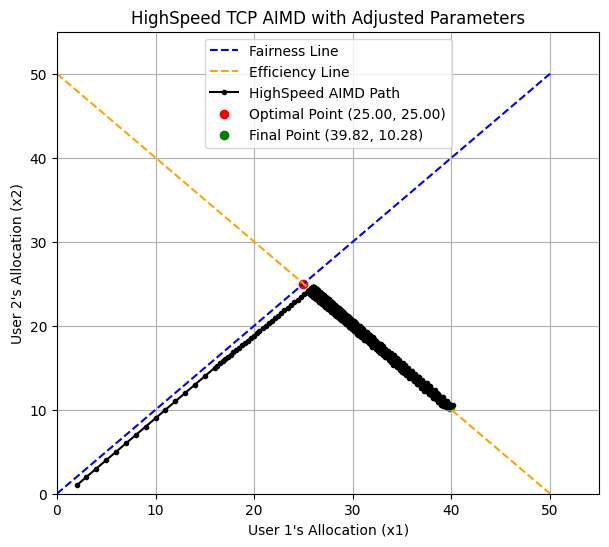

Number of iterations to converge: 1000
Final x1: 39.82, Final x2: 10.28


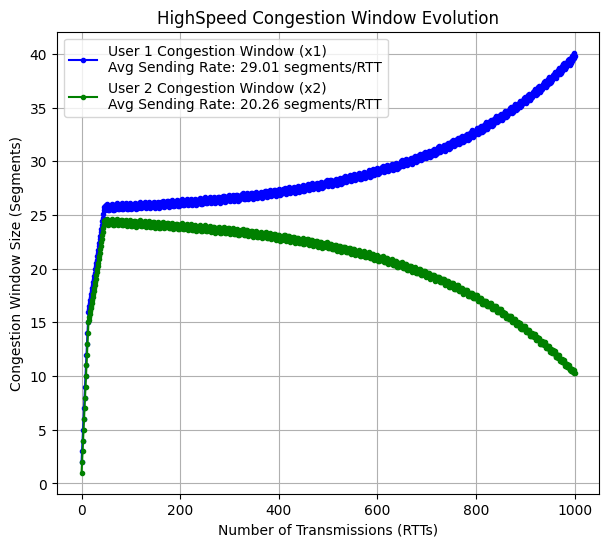

In [4]:
import datetime
import numpy as np
import matplotlib.pyplot as plt


def highspeed_aimd_simulation(C, x1, x2, alpha1, alpha2, beta1=0.5, beta2=0.5, threshold=30, max_iterations=1000):
    """
    Simulates the HighSpeed AIMD algorithm with threshold-based adjustments.

    Args:
        C (int): Maximum capacity.
        x1 (int): Initial allocation for User 1.
        x2 (int): Initial allocation for User 2.
        alpha1 (float): Additive increase factor for User 1.
        alpha2 (float): Additive increase factor for User 2.
        beta1 (float): Multiplicative decrease factor for User 1.
        beta2 (float): Multiplicative decrease factor for User 2.
        threshold (int): Threshold for switching to HighSpeed AIMD behavior.
        max_iterations (int): Maximum number of iterations for the simulation.

    Returns:
        tuple: Iterations, x1 values, x2 values, final x1, final x2.
    """
    iterations = 0
    x1_values = [x1]
    x2_values = [x2]

    # Dynamic growth and decrease functions for HighSpeed AIMD
    def dynamic_a(w):
        return 0.05 * (w ** 0.6)

    def dynamic_b(w):
        return 0.3 / (w + 2)

    while iterations < max_iterations:
        if x1 + x2 <= C:  # Additive Increase
            if x1 + x2 <= threshold:
                x1 += alpha1
                x2 += alpha2
            else:  # HighSpeed AIMD
                x1 += dynamic_a(x1)
                x2 += dynamic_a(x2)
        else:  # Multiplicative Decrease
            if x1 + x2 <= threshold:
                x1 *= (1 - beta1)
                x2 *= (1 - beta2)
            else:  # HighSpeed AIMD
                x1 *= (1 - dynamic_b(x1))
                x2 *= (1 - dynamic_b(x2))

        x1_values.append(x1)
        x2_values.append(x2)
        iterations += 1

        # Convergence condition
        # if abs(x1 + x2 - C) < 1e-2 and abs(x1 - x2) < 1e-2:
        if abs(x1 + x2 - C) < 1e-2 and abs(x1 - x2) < 1e-2:  # Convergence condition
            break

    return iterations, x1_values, x2_values, x1, x2


def plot_highspeed_aimd_results(C, x1_values, x2_values, iterations, title, output):
    """
    Plots the results of the HighSpeed AIMD simulation.

    Args:
        C (int): Maximum capacity.
        x1_values (list): Congestion window values for User 1.
        x2_values (list): Congestion window values for User 2.
        iterations (int): Number of iterations.
        title (str): Title of the plot.
        output (str): Output file name for the plot.
    """
    # Optimal point for fairness and efficiency
    optimal_x = C / 2
    optimal_y = C / 2

    # Fairness and efficiency lines
    fairness_line = np.linspace(0, C, 100)
    efficiency_line = C - fairness_line

    # Main plot
    plt.figure(figsize=(7, 6))
    plt.plot(fairness_line, fairness_line, 'b--', label='Fairness Line')
    plt.plot(fairness_line, efficiency_line, 'orange', linestyle='--', label='Efficiency Line')
    plt.plot(x1_values, x2_values, 'k.-', label='HighSpeed AIMD Path')
    plt.scatter(optimal_x, optimal_y, c='red', label=f'Optimal Point ({optimal_x:.2f}, {optimal_y:.2f})')
    plt.scatter(x1_values[-1], x2_values[-1], c='green', label=f'Final Point ({x1_values[-1]:.2f}, {x2_values[-1]:.2f})')

    # Labels and limits
    plt.xlabel("User 1's Allocation (x1)")
    plt.ylabel("User 2's Allocation (x2)")
    plt.xlim(0, C * 1.1)
    plt.ylim(0, C * 1.1)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig(output)
    plt.show()

    print(f"Number of iterations to converge: {iterations}")
    print(f"Final x1: {x1_values[-1]:.2f}, Final x2: {x2_values[-1]:.2f}")


def plot_highspeed_congestion_windows(rtt_values, x1_values, x2_values):
    """
    Plots the congestion window evolution for both users with the correct sending rate calculation.

    Args:
        rtt_values (list): RTT values (time steps).
        x1_values (list): Congestion window values for User 1.
        x2_values (list): Congestion window values for User 2.
    """
    sending_rate_x1 = sum(x1_values) / len(x1_values)  # Average congestion window size for User 1
    sending_rate_x2 = sum(x2_values) / len(x2_values)  # Average congestion window size for User 2

    plt.figure(figsize=(7, 6))

    # Plot for User 1
    plt.plot(rtt_values, x1_values, 'b.-', label=f"User 1 Congestion Window (x1)\nAvg Sending Rate: {sending_rate_x1:.2f} segments/RTT")

    # Plot for User 2
    plt.plot(rtt_values, x2_values, 'g.-', label=f"User 2 Congestion Window (x2)\nAvg Sending Rate: {sending_rate_x2:.2f} segments/RTT")

    # Labels, title, and grid
    plt.xlabel("Number of Transmissions (RTTs)")
    plt.ylabel("Congestion Window Size (Segments)")
    plt.title("HighSpeed Congestion Window Evolution")
    plt.legend()
    plt.grid(True)
    plt.show()


# Example usage with HighSpeed AIMD
if __name__ == "__main__":
    current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

    # HighSpeed AIMD Simulation
    iterations, x1_values, x2_values, final_x1, final_x2 = highspeed_aimd_simulation(
        C=50, x1=2, x2=1, alpha1=1, alpha2=1, beta1=0.5, beta2=0.5, threshold=30, max_iterations=1000
    )

    # Calculate RTT values for plotting
    rtt_values = np.arange(0, len(x1_values))

    # Plot AIMD Results
    plot_highspeed_aimd_results(
        C=50, x1_values=x1_values, x2_values=x2_values, iterations=iterations,
        title="HighSpeed TCP AIMD with Adjusted Parameters", output=f"highspeed_aimd_{current_time}.svg"
    )

    # Plot Congestion Windows
    plot_highspeed_congestion_windows(rtt_values, x1_values, x2_values)


## Reinforcement Learning-based AIMD
We introduce a reinforcement learning (RL) agent that dynamically selects \\( \alpha \\) and \\( \beta \\) based on past congestion experiences. The agent:
- Learns a Q-table to optimize throughput while minimizing packet loss.
- Uses exploration-exploitation to adapt congestion control behavior.

**Observations:**
- RL-AIMD achieves superior fairness and efficiency compared to fixed-parameter AIMD.
- The approach is highly adaptable but requires training data, limiting real-world applicability.

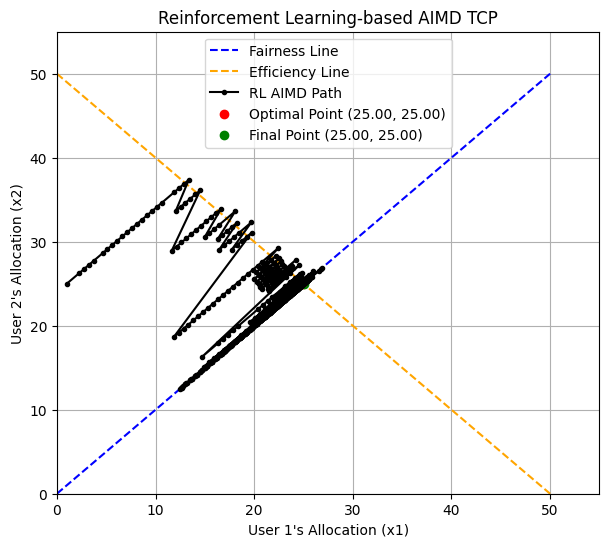

Number of iterations to converge: 695
Final x1: 25.00, Final x2: 25.00


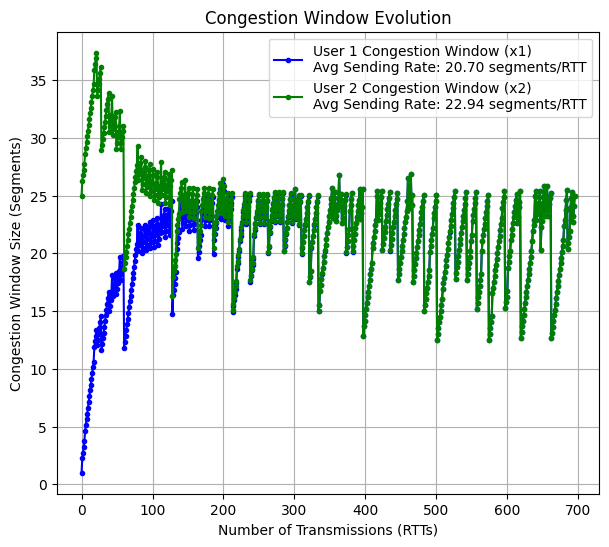

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random

class RL_AIMD_Agent:
    def __init__(self, alpha_range, beta_range, learning_rate=0.1, discount_factor=0.9, epsilon=0.1):
        self.alpha_range = alpha_range  # Possible values for alpha
        self.beta_range = beta_range  # Possible values for beta
        self.learning_rate = learning_rate  # Learning rate for Q-learning
        self.discount_factor = discount_factor  # Discount factor for future rewards
        self.epsilon = epsilon  # Exploration rate
        self.q_table = {}  # Q-table to store state-action values

    def get_state(self, x1, x2, C):
        return (round(x1, 1), round(x2, 1))

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(self.alpha_range), random.choice(self.beta_range)
        else:
            if state in self.q_table:
                return max(self.q_table[state], key=self.q_table[state].get)
            else:
                return random.choice(self.alpha_range), random.choice(self.beta_range)

    def update_q_table(self, state, action, reward, next_state):
        if state not in self.q_table:
            self.q_table[state] = {action: 0 for action in [(a, b) for a in self.alpha_range for b in self.beta_range]}
        if next_state not in self.q_table:
            self.q_table[next_state] = {action: 0 for action in [(a, b) for a in self.alpha_range for b in self.beta_range]}
        
        best_next_action = max(self.q_table[next_state], key=self.q_table[next_state].get)
        self.q_table[state][action] += self.learning_rate * (
            reward + self.discount_factor * self.q_table[next_state][best_next_action] - self.q_table[state][action]
        )


def aimd_rl_simulation(C, x1, x2, agent, max_iterations=1000, convergence_bonus=100):
    iterations = 0
    x1_values = [x1]
    x2_values = [x2]
    
    while iterations < max_iterations:
        state = agent.get_state(x1, x2, C)
        alpha, beta = agent.choose_action(state)
        
        if x1 + x2 <= C:
            x1 += alpha
            x2 += alpha  # Symmetric increase
        else:
            x1 *= (1 - beta)
            x2 *= (1 - beta)
        
        next_state = agent.get_state(x1, x2, C)
        reward = -abs((x1 + x2) - C)  # Reward based on proximity to capacity
        if abs(x1 + x2 - C) < 1e-2 and abs(x1 - x2) < 1e-2:  # Convergence condition
            reward += convergence_bonus  # Bonus for convergence
        agent.update_q_table(state, (alpha, beta), reward, next_state)
        
        x1_values.append(x1)
        x2_values.append(x2)
        iterations += 1
        
        # if abs(x1 + x2 - C) < 0.1 and abs(x1 - x2) < 0.1:
        if abs(x1 + x2 - C) < 1e-2 and abs(x1 - x2) < 1e-2:  # Convergence condition
            break

    
    return iterations, x1_values, x2_values


def plot_rl_aimd_results(C, x1_values, x2_values, iterations, title, output):
    optimal_x = C / 2
    optimal_y = C / 2
    fairness_line = np.linspace(0, C, 100)
    efficiency_line = C - fairness_line
    
    plt.figure(figsize=(7, 6))
    plt.plot(fairness_line, fairness_line, 'b--', label='Fairness Line')
    plt.plot(fairness_line, efficiency_line, 'orange', linestyle='--', label='Efficiency Line')
    plt.plot(x1_values, x2_values, 'k.-', label='RL AIMD Path')
    plt.scatter(optimal_x, optimal_y, c='red', label=f'Optimal Point ({optimal_x:.2f}, {optimal_y:.2f})')
    plt.scatter(x1_values[-1], x2_values[-1], c='green', label=f'Final Point ({x1_values[-1]:.2f}, {x2_values[-1]:.2f})')
    plt.xlabel("User 1's Allocation (x1)")
    plt.ylabel("User 2's Allocation (x2)")
    plt.xlim(0, C * 1.1)
    plt.ylim(0, C * 1.1)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig(output)
    plt.show()

    print(f"Number of iterations to converge: {iterations}")
    print(f"Final x1: {x1_values[-1]:.2f}, Final x2: {x2_values[-1]:.2f}")

def plot_congestion_windows(rtt_values, x1_values, x2_values):
    sending_rate_x1 = sum(x1_values) / len(rtt_values)
    sending_rate_x2 = sum(x2_values) / len(rtt_values)
    
    plt.figure(figsize=(7, 6))
    plt.plot(rtt_values, x1_values, 'b.-', label=f"User 1 Congestion Window (x1)\nAvg Sending Rate: {sending_rate_x1:.2f} segments/RTT")
    plt.plot(rtt_values, x2_values, 'g.-', label=f"User 2 Congestion Window (x2)\nAvg Sending Rate: {sending_rate_x2:.2f} segments/RTT")
    plt.xlabel("Number of Transmissions (RTTs)")
    plt.ylabel("Congestion Window Size (Segments)")
    plt.title("Congestion Window Evolution")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    agent = RL_AIMD_Agent(alpha_range=np.linspace(0.5, 2, 5), beta_range=np.linspace(0.1, 0.5, 5))
    
    iterations, x1_values, x2_values = aimd_rl_simulation(C=50, x1=1, x2=25, agent=agent)
    plot_rl_aimd_results(
        C=50, x1_values=x1_values, x2_values=x2_values, iterations=iterations,
        title="Reinforcement Learning-based AIMD TCP", output=f"rl_aimd_{current_time}.svg"
    )
    rtt_values = np.arange(0, iterations + 1)
    plot_congestion_windows(rtt_values, x1_values, x2_values)


# **TCP Congestion Control Dynamics and Perron-Frobenius Eigenvector Analysis**

This section simulates **TCP congestion control dynamics** using a transition matrix **A**, which models AIMD (Additive Increase, Multiplicative Decrease) behavior. We also compute the **Perron-Frobenius eigenvector** using two different methods:

1. **NumPy's Eigen Decomposition** (`np.linalg.eig`)
2. **Power Iteration Method**

By comparing the results, we verify if the TCP congestion window sizes **converge to the steady-state solution** given by the dominant eigenvector of matrix \( A \).


[[ 4.          8.         19.        ]
 [ 7.16666667  9.16666667 14.66666667]
 [ 8.75        9.75       12.5       ]
 [ 9.54166667 10.04166667 11.41666667]
 [ 9.9375     10.1875     10.875     ]
 [10.13541667 10.26041667 10.60416667]
 [10.234375   10.296875   10.46875   ]
 [10.28385417 10.31510417 10.40104167]
 [10.30859375 10.32421875 10.3671875 ]
 [10.32096354 10.32877604 10.35026042]
 [10.32714844 10.33105469 10.34179687]
 [10.33024089 10.33219401 10.3375651 ]
 [10.33178711 10.33276367 10.33544922]
 [10.33256022 10.3330485  10.33439128]
 [10.33294678 10.33319092 10.3338623 ]
 [10.33314006 10.33326213 10.33359782]
 [10.33323669 10.33329773 10.33346558]
 [10.33328501 10.33331553 10.33339945]
 [10.33330917 10.33332443 10.33336639]
 [10.33332125 10.33332888 10.33334986]
 [10.33332729 10.33333111 10.3333416 ]]


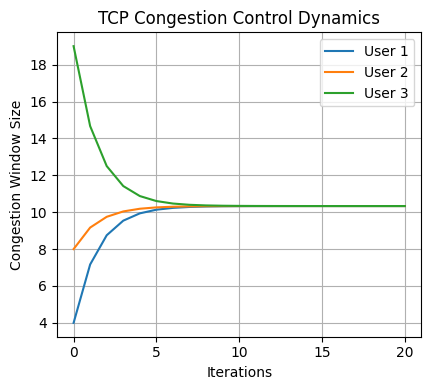

Perron-Frobenius eigenvalue (Power Iteration): 2.9999991638620216
Perron-Frobenius eigenvector (Power Iteration): [0.33333335 0.3333333  0.33333336]
Perron-Frobenius eigenvector (NumPy Eigen Decomposition): [0.33333333 0.33333333 0.33333333]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the positive matrix A
betas = np.array([[0.5, 0.5, 0.5]])
alphas = np.array([[1],
                   [1],
                   [1]])
one_minus_betas = 1 - betas

window_sizes = np.array([[4],
                         [8],
                         [19]])

A = np.array([[betas[0][0], 0, 0],
              [0, betas[0][1], 0],
              [0, 0, betas[0][2]]]) + (1 / np.sum(alphas) * (np.dot(alphas, one_minus_betas)))

# Simulate TCP dynamics
iterations = 20
tcp_states = [window_sizes.flatten()]
for i in range(iterations):
    window_sizes = np.dot(A, window_sizes)
    tcp_states.append(window_sizes.flatten())

tcp_states = np.array(tcp_states)
print(tcp_states)

# Compute Perron-Frobenius eigenvector using numpy eigen decomposition
def perron_frobenius_right_eigenvector(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    max_eigenvalue_index = np.argmax(np.real(eigenvalues))
    perron_frobenius_eigenvector = np.real(eigenvectors[:, max_eigenvalue_index])
    perron_frobenius_eigenvector /= np.sum(perron_frobenius_eigenvector)  # Normalize
    return perron_frobenius_eigenvector

pf_eigenvector_numpy = perron_frobenius_right_eigenvector(A)

# Compute Perron-Frobenius eigenvector using power iteration
def perron_frobenius(matrix, tol=1e-6, max_iter=1000):
    n = len(matrix)
    v = np.random.rand(n)
    v /= np.sum(v)

    prev_eigenvalue = 0
    for _ in range(max_iter):
        Av = np.dot(matrix, v)
        eigenvalue = np.dot(v, Av)
        v = Av / np.linalg.norm(Av, ord=np.inf)  # Normalize
        if np.abs(eigenvalue - prev_eigenvalue) < tol:
            break
        prev_eigenvalue = eigenvalue

    return eigenvalue, v / np.sum(v)  # Normalize the eigenvector

pf_eigenvalue_iter, pf_eigenvector_iter = perron_frobenius(A)

# Plot TCP Dynamics over Iterations
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
for i in range(tcp_states.shape[1]):
    plt.plot(range(iterations + 1), tcp_states[:, i], label=f"User {i+1}")

plt.title("TCP Congestion Control Dynamics")
plt.xlabel("Iterations")
plt.ylabel("Congestion Window Size")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Print computed values
print("Perron-Frobenius eigenvalue (Power Iteration):", pf_eigenvalue_iter)
print("Perron-Frobenius eigenvector (Power Iteration):", pf_eigenvector_iter)
print("Perron-Frobenius eigenvector (NumPy Eigen Decomposition):", pf_eigenvector_numpy)
